# 311 Systems report

### Clicking the soda link will just download you the relevant columns
[*311 complaint dataset*](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
[**311 Soda Download link**](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
). 
[*PLUTO dataset for housing*](https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf). 
 

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

### This notebook answers the Question 4 - Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

#### Load in Data Import librarys

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

/Users/kealanclarke/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_1 = pd.read_csv('./NYCdata.csv')

### Clean data and consolidate the heating/hot water 

In [3]:
df_1['complaint_type'] = np.where(df_1['complaint_type']=='HEATING','HEAT/HOT WATER',df_1['complaint_type'])
df_1['complaint_type'].value_counts()

HEAT/HOT WATER            2149506
PLUMBING                   711184
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451689
PAINT - PLASTER            361257
PAINT/PLASTER              346473
ELECTRIC                   307330
NONCONST                   260890
DOOR/WINDOW                205293
WATER LEAK                 193649
GENERAL                    151325
FLOORING/STAIRS            137427
APPLIANCE                  112838
HPD Literature Request      52830
SAFETY                      51533
OUTSIDE BUILDING             7143
ELEVATOR                     6727
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

### Update format for  'created_date' object to pandas datetime

In [4]:
df_1['created_date'] =  pd.to_datetime(df_1['created_date'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020177 entries, 0 to 6020176
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 689.0+ MB


### Remove any that aren't heat / hot water for this predictive anaylsis

In [5]:
df_1 = df_1[df_1['complaint_type'] == "HEAT/HOT WATER"]

### Create new dataframe and then sort out date layout to make it easier to graph on a year/month basis

In [6]:
df_2 = df_1[['created_date', 'unique_key']].copy()

In [7]:
df_2.head()

,created_date,unique_key
1,2020-02-02 12:05:51,45527544
3,2020-02-02 11:47:36,45528468
4,2020-02-02 18:13:17,45531148
5,2020-02-02 19:46:12,45530342
6,2020-02-02 15:10:29,45529827


In [8]:
df_2["created_date"] = pd.to_datetime(df_2['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
df_2["year"] = df_2["created_date"].dt.year
df_2["month"] = df_2["created_date"].dt.month
df_2["day"] = df_2["created_date"].dt.dayofweek

In [9]:
df_2['created_date'] = df_2['created_date'].map(lambda x: x.strftime('%Y-%m'))

In [10]:
df_2 = df_2.sort_values('created_date')
df_2.head()

,created_date,unique_key,year,month,day
312992,2010-01,15809684,2010,1,1
304888,2010-01,15777837,2010,1,3
304889,2010-01,15777838,2010,1,3
304890,2010-01,15777839,2010,1,3
304891,2010-01,15777840,2010,1,3


### count number of heat/hot water complaints as we'd seperated by that earlier

In [11]:
df_3 = df_2["created_date"].value_counts()

In [12]:
df_3 = df_3.sort_index(ascending=True)

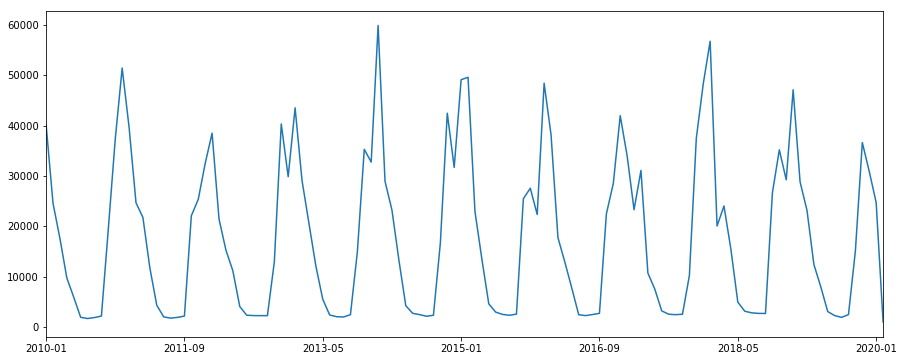

In [13]:
df_3.plot(figsize=(15, 6))
plt.show()

## Create a trend, seasonality for noise as  Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.



In [14]:
df_3.index = pd.to_datetime(df_3.index)

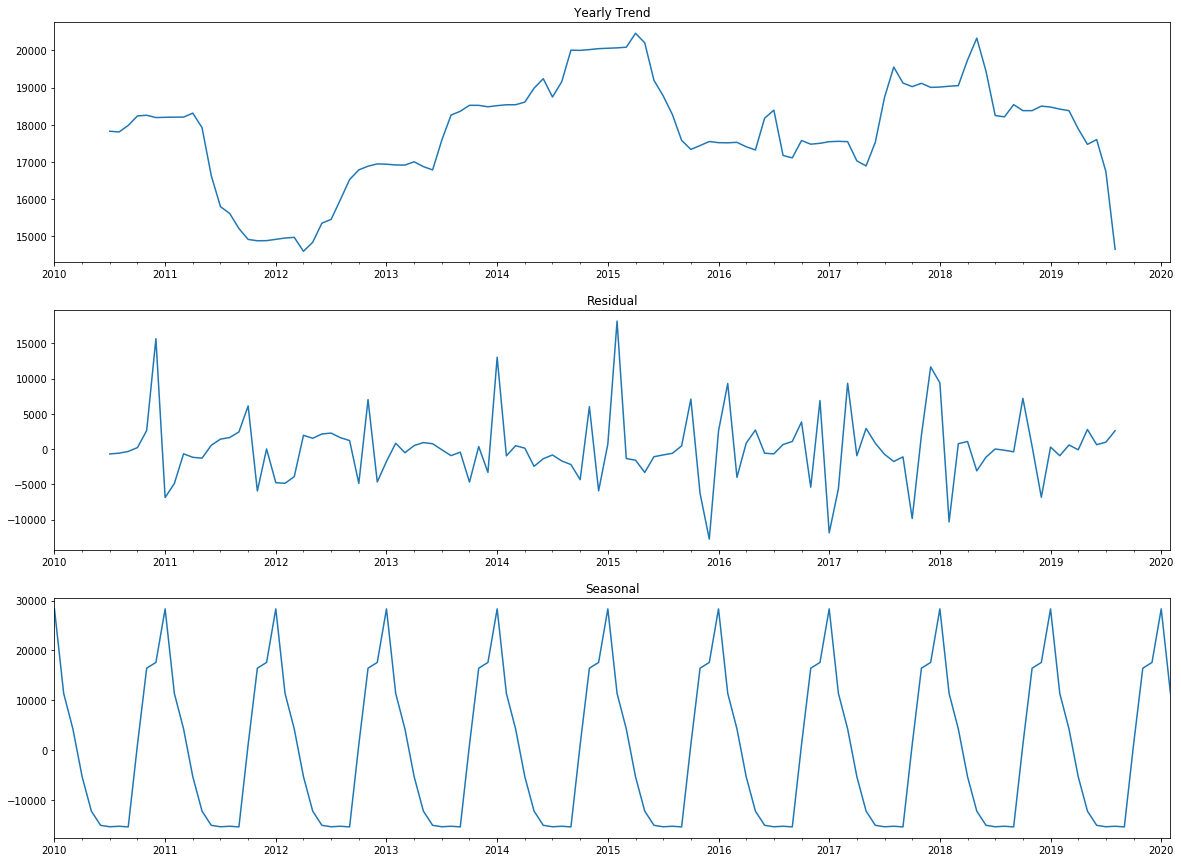

In [15]:
decomposition = sm.tsa.seasonal_decompose(df_3, model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,15))
ax1.title.set_text('Yearly Trend')
ax2.title.set_text('Residual')
ax3.title.set_text('Seasonal')
decomposition.trend.plot(ax=ax1)
decomposition.resid.plot(ax=ax2)
decomposition.seasonal.plot(ax=ax3)
plt.show()

Above, the residual plots show three typical patterns. The first plot shows a random pattern, indicating a good fit for a linear model





Compute the mean square error